In [7]:
%matplotlib inline

In [4]:
def l_bol(wl,fv,dist=178):
    import numpy as np
    import astropy.constants as const
    import astropy.units as uni
    import matplotlib.pyplot as plt
    # wavelength unit: um
    # Flux density unit: Jy
    #
    # constants setup
    #
    c = const.c.cgs.value
    pc = 3.086e+18
    PI = np.pi
    SL = 3.846e+33
    # Convert the unit from Jy to erg s-1 cm-2 Hz-1
    fv = np.array(fv)*1e-23
    freq = c/(1e-4*np.array(wl))
    
    diff_dum = freq[1:]-freq[0:-1]
    freq_interpol = np.hstack((freq[0:-1]+diff_dum/2.0,freq[0:-1]+diff_dum/2.0,freq[0],freq[-1]))
    ol = np.hstack((freq[0:-1]+diff_dum/2.0,freq[0:-1]+diff_dum/2.0,freq[0],freq[-1]))
    freq_interpol = freq_interpol[np.argsort(freq_interpol)[::-1]]
    fv_interpol = np.empty(len(freq_interpol))
    # calculate the histogram style of spectrum
    #
    for i in range(0,len(fv)):
        if i == 0:
            fv_interpol[i] = fv[i]
        else:
            fv_interpol[2*i-1] = fv[i-1]
            fv_interpol[2*i] = fv[i]
    fv_interpol[-1] = fv[-1]
    
    dv = freq_interpol[0:-1]-freq_interpol[1:]
    dv = np.delete(dv,np.where(dv==0))

    fv = fv[np.argsort(freq)]
    freq = freq[np.argsort(freq)]
#     fig = plt.figure(figsize=(6,4))
#     ax = fig.add_subplot(111)
#     ax.plot(freq,fv)
#     ax.set_xlim([1e12,3e13])
#     return (np.sum(dv*fv)*4*PI*(dist*pc)**2)/SL
    return (np.trapz(fv,freq)*4.*PI*(dist*pc)**2)/SL

In [19]:
def plot_spectrum(obj,pacs=True,spire=True,mag=1.5,spire_factor=0.6):
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    home = os.path.expanduser('~')
    
#     indir = home+'/bhr71/fitting/BHR71/'
    indir = home+'/test/L1157/'
    
    fig = plt.figure(figsize=(8,6))
    ax = fig.add_subplot(111)
    
    if pacs == True:
        [wl_pacs,flux_pacs] = np.genfromtxt(indir+'pacs/data/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt',skip_header=1).T
        [wl_flat_pacs,flux_flat_pacs] = np.genfromtxt(indir+'pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_flat_spectrum.txt',skip_header=1).T
        [wl_cont_pacs,flux_cont_pacs] = np.genfromtxt(indir+'pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_continuum.txt',skip_header=1).T
        [wl_resi_pacs,flux_resi_pacs] = np.genfromtxt(indir+'pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_residual_spectrum.txt',skip_header=1).T
        ax.plot(wl_pacs[wl_pacs<100],flux_pacs[wl_pacs<100],'-',color='Green',alpha=0.7,linewidth=0.7*mag)
        pacs_spec, = ax.plot(wl_flat_pacs[wl_pacs<100],flux_flat_pacs[wl_pacs<100],'-',color='Green',linewidth=0.7*mag)
        ax.plot(wl_pacs[wl_pacs>100],flux_pacs[wl_pacs>100],'-',color='Green',alpha=0.7,linewidth=0.7*mag)
        ax.plot(wl_flat_pacs[wl_pacs>100],flux_flat_pacs[wl_pacs>100],'-',color='Green',linewidth=0.7*mag)
        cont, = ax.plot(wl_cont_pacs[wl_pacs<100],flux_cont_pacs[wl_pacs<100],'-',color='Blue',linewidth=1*mag)
        ax.plot(wl_cont_pacs[wl_pacs>100],flux_cont_pacs[wl_pacs>100],'-',color='Blue',linewidth=1*mag)
        resi, = ax.plot(wl_resi_pacs[wl_pacs<100], flux_resi_pacs[wl_pacs<100]-5,'-',color='k',linewidth=1*mag)
        ax.plot(wl_resi_pacs[wl_pacs>100],flux_resi_pacs[wl_pacs>100]-5,'-',color='k',linewidth=1*mag)
    if spire == True:
        [wl_spire,flux_spire] = np.genfromtxt(indir+'spire/data/'+obj+'_spire_corrected.txt',skip_header=1).T
        [wl_flat_spire,flux_flat_spire] = np.genfromtxt(indir+'spire/advanced_products/'+obj+'_spire_corrected_flat_spectrum.txt',skip_header=1).T
        [wl_cont_spire,flux_cont_spire] = np.genfromtxt(indir+'spire/advanced_products/'+obj+'_spire_corrected_continuum.txt',skip_header=1).T
        [wl_resi_spire,flux_resi_spire] = np.genfromtxt(indir+'spire/advanced_products/'+obj+'_spire_corrected_residual_spectrum.txt',skip_header=1).T
        ax.plot(wl_spire[wl_spire<304],flux_spire[wl_spire<304]*spire_factor,'-',color='Red',alpha=0.7,linewidth=0.7*mag)
        spire_ssw, = ax.plot(wl_flat_spire[wl_flat_spire<304],flux_flat_spire[wl_flat_spire<304],'-',color='Red',linewidth=0.7*mag)
        ax.plot(wl_spire[wl_spire>=304],flux_spire[wl_spire>=304]*spire_factor,'-',color='Red',alpha=0.7,linewidth=0.7*mag)
        spire_slw, = ax.plot(wl_flat_spire[wl_flat_spire>=304],flux_flat_spire[wl_flat_spire>=304],'-',color='Red',linewidth=0.7*mag)
        ax.plot(wl_cont_spire,flux_cont_spire*spire_factor,'-',color='Blue',linewidth=1*mag)
        resi, = ax.plot(wl_resi_spire[wl_spire<304],flux_resi_spire[wl_spire<304]-5,'-',color='k',linewidth=1*mag)
        ax.plot(wl_resi_spire[wl_spire>=304],flux_resi_spire[wl_spire>=304]-5,'-',color='k',linewidth=1*mag)
    
    ax.set_xlabel(r'$\rm{Wavelength\,[{\mu}m]}$',fontsize=18)
    ax.set_ylabel(r'$\rm{Flux\,Density\,[Jy]}$',fontsize=18)
    [ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
    ax.minorticks_on()
    ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=10,length=5)
    ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=10,length=2.5)
    # take out the minus tick label on the flux-axis
#     yticks = ax.yaxis.get_major_ticks()
#     yticks[0].label1.set_visible(False)
    #
    if pacs*spire == True:
#         lg_data = ax.legend([pacs_spec,spire_spec,cont],[r'$\mathrm{PACS}$',r'$\mathrm{SPIRE~(\times 0.6)}$',r'$\mathrm{Continuum}$'],loc='upper right',fontsize=14*mag,numpoints=1)
        if spire_factor != 1:
            lg_data = ax.legend([pacs_spec,spire_ssw],[r'$\rm{PACS}$',r'$\rm{SPIRE\,(\times'+str(spire_factor)+')}$'],loc='upper right',fontsize=16,numpoints=1)
        else:
            lg_data = ax.legend([pacs_spec,spire_ssw],[r'$\rm{PACS}$',r'$\rm{SPIRE}$'],loc='upper right',fontsize=16,numpoints=1)
  
    ax.set_xlim([50,670])
#     ax.set_ylim([-30,400])
    
    fig.savefig(filename=indir+obj+'_all_spec_rawobs.pdf',format='pdf',dpi=300,bbox_inches='tight')
    

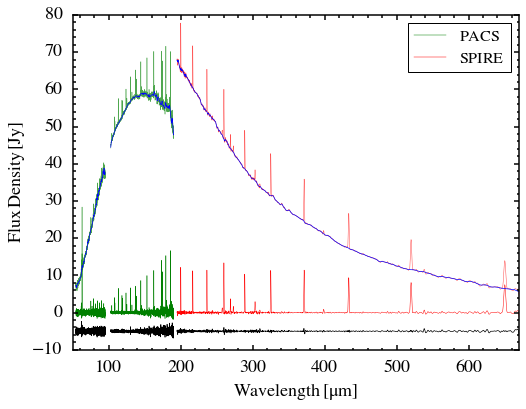

In [21]:
plot_spectrum('L1157', spire_factor=1, mag=0.7)

In [196]:
# Flat spectrum with line indicators (for Neal's NSF proposal)
def plot_flat(obj,pacs=True,spire=True,mag=1.5,line_ind=True,freq=False):
    import numpy as np
    import matplotlib.pyplot as plt
    import os
    home = os.path.expanduser('~')
    
    indir = home+'/FWD_archive/FWD_archive/'+obj+'/'
    c = 2.998e10
    
    # What lines should be indicated in the plot
    water = [[r'$\mathrm{o-H_{2}O~1_{10}-1_{01}}$',r'$\mathrm{p-H_{2}O~1_{11}-0_{00}}$',r'$\mathrm{p-H_{2}O~2_{11}-2_{02}}$',\
              r'$\mathrm{p-H_{2}O~2_{02}-1_{11}}$',r'$\mathrm{o-H_{2}O~3_{21}-2_{12}}$',r'$\mathrm{o-H_{2}O~6_{16}-5_{05}}$',\
              r'$\mathrm{p-H_{2}O~3_{13}-2_{02}}$',r'$\mathrm{o-H_{2}O~4_{14}-3_{03}}$',r'$\mathrm{o-H_{2}O~3_{03}-2_{12}}$',\
              r'$\mathrm{p-H_{2}O~5_{33}-6_{06}}$',r'$\mathrm{p-H_{2}O~7_{35}-6_{42}}$'],\
             [538.3023584,269.2790845,398.6525967,303.4638096,75.38256836,82.03350830,138.5312653,113.5402069,174.6302795,\
              174.6112671,169.7430420],\
             ['-','Purple']]
    atomic = [[r'$\mathrm{[OI]~3P_{1}-3P_{2}}$',r'$\mathrm{[OI]~3P_{1}-3P_{0}$',r'$\mathrm{[CII]~2P{3/2}-2P{1/2}}$'],\
              [63.18367004,145.4805603,157.6922760],['-','Blue']]
    oh = [[r'$mathrm{OH~5-1}$',r'$mathrm{OH~4-0}$',r'$\mathrm{OH~8-2}$',r'$\mathrm{OH~3-1}$',r'$mathrm{OH~2-0}$',\
           r'$\mathrm{OH~6-4}$',r'$\mathrm{OH~14-12}$',r'$\mathrm{OH~6-4}$'],\
          [79.11753845,79.18106079,84.59877014,119.2374039,119.4444962,163.4001312,134.8415222,163.4001312],\
          ['-','Orange']]
    cii = [[r'$\mathrm{[CII]~2P{3/2}-2P{1/2}}$'],[157.6922760],['-','Blue']]
    
    if pacs == True:
        [wl_pacs,flux_pacs,unc_pacs] = np.genfromtxt(indir+'pacs/data/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt').T
        [wl_flat_pacs,flux_flat_pacs,unc_flat_pacs] = np.genfromtxt(indir+'pacs/advanced_products/'+obj+'_centralSpaxel_PointSourceCorrected_CorrectedYES_trim_flat_spectrum.txt',skip_header=1).T
    
    if spire == True:
        [wl_spire,flux_spire] = np.genfromtxt(indir+'spire/data/'+obj+'_spire_corrected.txt').T
        [wl_flat_spire,flux_flat_spire] = np.genfromtxt(indir+'spire/advanced_products/'+obj+'_spire_corrected_flat_spectrum.txt',skip_header=1).T
        
    fig = plt.figure(figsize(15*mag,6*mag))
    ax = fig.add_subplot(111)
    if freq == False:
        pacs_spec, = ax.plot(wl_flat_pacs[wl_pacs<100],flux_flat_pacs[wl_pacs<100],'-',color='Green',linewidth=1)
        ax.plot(wl_flat_pacs[wl_pacs>100],flux_flat_pacs[wl_pacs>100],'-',color='Green',linewidth=1)

        spire_spec, = ax.plot(wl_flat_spire,flux_flat_spire,'r-',linewidth=1)

        for iwater in range(0,len(water[0])):
            water_plot, = ax.plot([water[1][iwater],water[1][iwater]],[-10,-15],linestyle=water[2][0],color=water[2][1],linewidth=1.5)
        for iatom in range(0,len(atomic[0])):
            atom_plot, = ax.plot([atomic[1][iatom],atomic[1][iatom]],[-10,-15],linestyle=atomic[2][0],color=atomic[2][1],linewidth=1.5)
        for ioh in range(0,len(oh[0])):
            oh_plot, = ax.plot([oh[1][ioh],oh[1][ioh]],[-10,-15],linestyle=oh[2][0],color=oh[2][1],linewidth=1.5)
        ax.set_xlabel(r'$\mathrm{\lambda~({\mu}m)}$',fontsize=mag*20)
        ax.set_ylabel(r'$\mathrm{S_{\nu}~(Jy)}$',fontsize=mag*20)
        ax.set_xlim([50,670])
    else:
        pacs_spec, = ax.plot(c*1e-5/wl_flat_pacs[wl_pacs<100],flux_flat_pacs[wl_pacs<100],'-',color='Green',linewidth=1)
        ax.plot(c*1e-5/wl_flat_pacs[wl_pacs>100],flux_flat_pacs[wl_pacs>100],'-',color='Green',linewidth=1)

        spire_spec, = ax.plot(c*1e-5/wl_flat_spire,flux_flat_spire,'r-',linewidth=1)

        for iwater in range(0,len(water[0])):
            water_plot, = ax.plot([c*1e-5/water[1][iwater],c*1e-5/water[1][iwater]],[-10,-15],linestyle=water[2][0],color=water[2][1],linewidth=1.5)
        for iatom in range(0,len(atomic[0])):
            atom_plot, = ax.plot([c*1e-5/atomic[1][iatom],c*1e-5/atomic[1][iatom]],[-10,-15],linestyle=atomic[2][0],color=atomic[2][1],linewidth=1.5)
        for ioh in range(0,len(oh[0])):
            oh_plot, = ax.plot([c*1e-5/oh[1][ioh],c*1e-5/oh[1][ioh]],[-10,-15],linestyle=oh[2][0],color=oh[2][1],linewidth=1.5)
        ax.set_xlabel(r'$\mathrm{Frequency~(GHz)}$',fontsize=mag*20)
        ax.set_ylabel(r'$\mathrm{S_{\nu}~(Jy)}$',fontsize=mag*20)
        ax.set_xlim([400,5600])
    [ax.spines[axis].set_linewidth(1.5*mag) for axis in ['top','bottom','left','right']]
    ax.minorticks_on()
    ax.tick_params('both',labelsize=mag*18,width=1.5*mag,which='major',pad=15,length=5*mag)
    ax.tick_params('both',labelsize=mag*18,width=1.5*mag,which='minor',pad=15,length=2.5*mag)
    lg_data = ax.legend([pacs_spec,spire_spec],[r'$\mathrm{PACS}$',r'$\mathrm{SPIRE}$'],loc='upper left',fontsize=14*mag,numpoints=1)
    lg_ind = ax.legend([water_plot,atom_plot,oh_plot],[r'$\mathrm{water}$',r'$\mathrm{atomic~fine}$-$\mathrm{structure}$',r'$\mathrm{OH}$'],fontsize=14*mag,numpoints=1)
    plt.gca().add_artist(lg_data)

    
    fig.savefig(home+'/radmc_simulation/bhr71/analysis_plots/'+obj+'_all_spec_flat.pdf',format='pdf',dpi=300,bbox_inches='tight',pad_inches=0.5)
    
    

In [ ]:
plot_flat('BHR71',freq=True)

In [11]:
def plot_sed(obj='BHR71',mag=1.5):
    import numpy as np
    import matplotlib.pyplot as plt
    import astropy.constants as const
    import scipy.interpolate as itp
    
    c = const.c.cgs.value
    # Read Herschel spectra
    # Convert the unit from Jy to erg cm-2 Hz-1
    [wl_pacs,flux_pacs] = np.genfromtxt('/Users/yaolun/bhr71/fitting/BHR71/pacs/data/BHR71_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt',\
                                        dtype='float',skip_header=1).T
    flux_pacs = flux_pacs*1e-23
    [wl_spire,flux_spire] = np.genfromtxt('/Users/yaolun/bhr71/fitting/BHR71/spire/data/BHR71_spire_corrected.txt',dtype='float',skip_header=1).T
    flux_spire = flux_spire*1e-23
    
    wl_obs = np.hstack((wl_pacs,wl_spire))
    flux_obs = np.hstack((flux_pacs,flux_spire))
    
    # Read in the Spitzer IRS spectrum
    [wl_irs, flux_irs]= (np.genfromtxt('/Users/yaolun/bhr71/obs_for_radmc/bhr71_spitzer_irs.txt',skip_header=2,dtype='float').T)[0:2]
    # Convert the unit from Jy to erg cm-2 Hz-1
    flux_irs = flux_irs*1e-23
    # Remove points with zero or negative flux 
    ind = flux_irs > 0
    wl_irs = wl_irs[ind]
    flux_irs = flux_irs[ind]
    
    # Read in the photometry data
    phot = np.genfromtxt('/Users/yaolun/bhr71/obs_for_radmc/bhr71.txt',dtype=None,skip_header=1,comments='%')
    wl_phot = []
    flux_phot = []
    flux_sig_phot = []
    note = []
    for i in range(0,len(phot)):
        if phot[i][0] in [9, 18, 3000]:
            continue
        wl_phot.append(phot[i][0])
        flux_phot.append(phot[i][1])
        flux_sig_phot.append(phot[i][2])
        note.append(phot[i][4])
    wl_phot = np.array(wl_phot)
    print wl_phot
    # Convert the unit from Jy to erg cm-2 Hz-1
    flux_phot = np.array(flux_phot)*1e-23
    flux_sig_phot = np.array(flux_sig_phot)*1e-23
    note = np.array(note)

    # Calculate the bolometric luminosity
    wl_tot = np.hstack((wl_irs,wl_obs,wl_phot))
    flux_tot = np.hstack((flux_irs,flux_obs,flux_phot))
    flux_tot = flux_tot[np.argsort(wl_tot)]
    wl_tot = wl_tot[np.argsort(wl_tot)]
    l_bol_obs = l_bol(wl_tot[wl_tot < 700],flux_tot[wl_tot < 700]*1e23)
    
    # Plot the whole SED
    fig = plt.figure(figsize=(mag*8,mag*6))
    ax_sed = fig.add_subplot(111)

    spec_pacs, = ax_sed.plot(np.log10(wl_pacs),np.log10(c/(wl_pacs*1e-4)*flux_pacs),'-',color='Green',linewidth=1*mag)
    spec_spire, = ax_sed.plot(np.log10(wl_spire),np.log10(c/(wl_spire*1e-4)*flux_spire),'-',color='Red',linewidth=1*mag)
    spec_irs, = ax_sed.plot(np.log10(wl_irs),np.log10(c/(wl_irs*1e-4)*flux_irs),'-',color='Blue',linewidth=1*mag)
    ax_sed.text(0.75,0.9,r'$\rm{L_{bol}= %5.2f \,L_{\odot}}$' % l_bol_obs,fontsize=mag*16,transform=ax_sed.transAxes) 
    # plot the observed photometry data
    irac, = ax_sed.plot(np.log10(wl_phot[note == 'IRAC']),np.log10(c/(wl_phot[note == 'IRAC']*1e-4)*flux_phot[note == 'IRAC']),'s',mfc='DimGray',mec='k',markersize=8)
    ax_sed.errorbar(np.log10(wl_phot[note == 'IRAC']),np.log10(c/(wl_phot[note == 'IRAC']*1e-4)*flux_phot[note == 'IRAC']),yerr=flux_sig_phot[note == 'IRAC'],fmt='s',mfc='DimGray',mec='k',markersize=8)
    mips, = ax_sed.plot(np.log10(wl_phot[note == 'MIPS']),np.log10(c/(wl_phot[note == 'MIPS']*1e-4)*flux_phot[note == 'MIPS']),'^',mfc='DimGray',mec='k',markersize=8)
    ax_sed.errorbar(np.log10(wl_phot[note == 'MIPS']),np.log10(c/(wl_phot[note == 'MIPS']*1e-4)*flux_phot[note == 'MIPS']),yerr=flux_sig_phot[note == 'MIPS'],fmt='^',mfc='DimGray',mec='k',markersize=8)
#     akari, = ax_sed.plot(np.log10(wl_phot[note == 'AKARI']),np.log10(c/(wl_phot[note == 'AKARI']*1e-4)*flux_phot[note == 'AKARI']),'v',mfc='DimGray',mec='k',markersize=8)
#     ax_sed.errorbar(np.log10(wl_phot[note == 'AKARI']),np.log10(c/(wl_phot[note == 'AKARI']*1e-4)*flux_phot[note == 'AKARI']),yerr=flux_sig_phot[note == 'AKARI'],fmt='v',mfc='DimGray',mec='k',markersize=8)
    spire, = ax_sed.plot(np.log10(wl_phot[note == 'SPIRE']),np.log10(c/(wl_phot[note == 'SPIRE']*1e-4)*flux_phot[note == 'SPIRE']),'D',mfc='DimGray',mec='k',markersize=8)
    ax_sed.errorbar(np.log10(wl_phot[note == 'SPIRE']),np.log10(c/(wl_phot[note == 'SPIRE']*1e-4)*flux_phot[note == 'SPIRE']),yerr=flux_sig_phot[note == 'SPIRE'],fmt='D',mfc='DimGray',mec='k',markersize=8)
    sest, = ax_sed.plot(np.log10(wl_phot[note == 'SEST']),np.log10(c/(wl_phot[note == 'SEST']*1e-4)*flux_phot[note == 'SEST']),'*',mfc='DimGray',mec='k',markersize=10)
    ax_sed.errorbar(np.log10(wl_phot[note == 'SEST']),np.log10(c/(wl_phot[note == 'SEST']*1e-4)*flux_phot[note == 'SEST']),yerr=flux_sig_phot[note == 'SEST'],fmt='*',mfc='DimGray',mec='k',markersize=10)
#     atca, = ax_sed.plot(np.log10(wl_phot[note == 'SCUBA']),np.log10(c/(wl_phot[note == 'SCUBA']*1e-4)*flux_phot[note == 'SCUBA']),'p',mfc='DimGray',mec='k',markersize=8)
#     ax_sed.errorbar(np.log10(wl_phot[note == 'SCUBA']),np.log10(c/(wl_phot[note == 'SCUBA']*1e-4)*flux_phot[note == 'SCUBA']),yerr=flux_sig_phot[note == 'SCUBA'],fmt='p',mfc='DimGray',mec='k',markersize=8)
    pacs, = ax_sed.plot(np.log10(wl_phot[note == 'PACS']),np.log10(c/(wl_phot[note == 'PACS']*1e-4)*flux_phot[note == 'PACS']),'8',mfc='DimGray',mec='k',markersize=8)
    ax_sed.errorbar(np.log10(wl_phot[note == 'PACS']),np.log10(c/(wl_phot[note == 'PACS']*1e-4)*flux_phot[note == 'PACS']),yerr=flux_sig_phot[note == 'PACS'],fmt='8',mfc='DimGray',mec='k',markersize=8)
    
    # Plot fine-tune
    ax_sed.set_xlabel(r'$\rm{log\,\lambda\,({\mu}m)}$',fontsize=mag*20)
    ax_sed.set_ylabel(r'$\rm{log\,\nu S_{\nu}\,(erg\,cm^{-12}\,s^{-1})}$',fontsize=mag*20)
    [ax_sed.spines[axis].set_linewidth(1.5*mag) for axis in ['top','bottom','left','right']]
    ax_sed.minorticks_on()
    ax_sed.tick_params('both',labelsize=mag*18,width=1.5*mag,which='major',pad=15,length=5*mag)
    ax_sed.tick_params('both',labelsize=mag*18,width=1.5*mag,which='minor',pad=15,length=2.5*mag)
    
    ax_sed.set_ylim([-14,-7])
    ax_sed.set_xlim([0,3.5])

    lg_spec = ax_sed.legend([spec_irs, spec_pacs, spec_spire,irac,mips,pacs,spire,sest],\
                            [r'${\it Spitzer}\rm -IRS$',r'${\it Herschel}\rm -PACS$',r'${\it Herschel}\rm -SPIRE$',\
                             'IRAC','MIPS','PACS','SPIRE','SEST'],\
                            loc='lower right',ncol=2,fontsize=14*mag,numpoints=1,framealpha=0.3)
    plt.gca().add_artist(lg_spec)
    fig.savefig('/Users/yaolun/bhr71/BHR71_sed.pdf',format='pdf',dpi=300,bbox_inches='tight')

[    3.6     4.5     5.8     8.     24.   1300.     70.    100.    160.
   250.    350.    500. ]


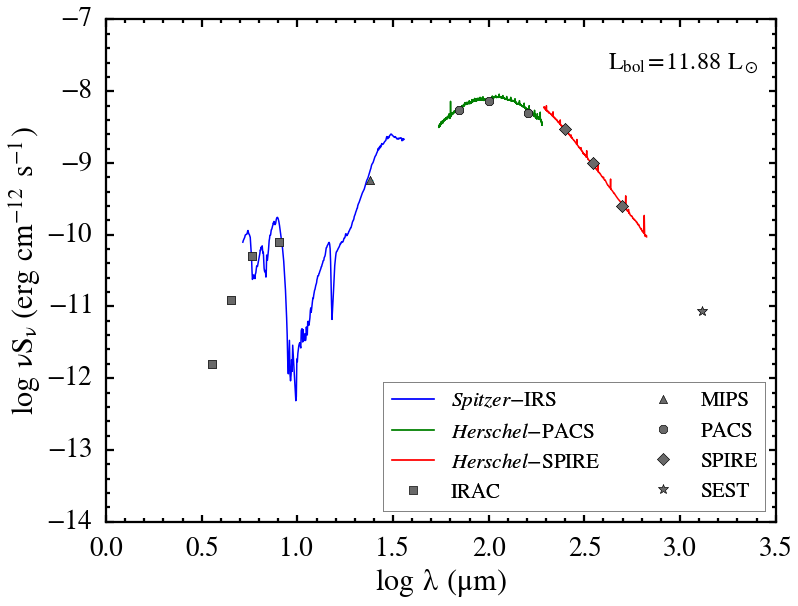

In [12]:
plot_sed()

In [9]:
def plot_sed_split(obj='BHR71',mag=1.5):
    import numpy as np
    import matplotlib.pyplot as plt
    import astropy.constants as const
    import scipy.interpolate as itp
    
    c = const.c.cgs.value
    # Read Herschel spectra
    # Convert the unit from Jy to erg cm-2 Hz-1
    [wl_pacs,flux_pacs,unc_pacs] = np.genfromtxt('/Users/yaolun/bhr71/obs_for_radmc/BHR71_centralSpaxel_PointSourceCorrected_CorrectedYES_trim.txt',\
                                        dtype='float',skip_header=1).T
    flux_pacs = flux_pacs*1e-23
    [wl_spire,flux_spire] = np.genfromtxt('/Users/yaolun/bhr71/obs_for_radmc/BHR71_spire_corrected.txt',dtype='float',skip_header=1).T
    flux_spire = flux_spire*1e-23
    
    wl_obs = np.hstack((wl_pacs,wl_spire))
    flux_obs = np.hstack((flux_pacs,flux_spire))
    
    # Read in the Spitzer IRS spectrum
    [wl_irs, flux_irs]= (np.genfromtxt('/Users/yaolun/bhr71/obs_for_radmc/bhr71_spitzer_irs.txt',skip_header=2,dtype='float').T)[0:2]
    # Convert the unit from Jy to erg cm-2 Hz-1
    flux_irs = flux_irs*1e-23
    # Remove points with zero or negative flux 
    ind = flux_irs > 0
    wl_irs = wl_irs[ind]
    flux_irs = flux_irs[ind]
    
    # Read in the photometry data
    phot = np.genfromtxt('/Users/yaolun/bhr71/obs_for_radmc/bhr71_wo_comment.txt',dtype=None,skip_header=1,comments='%')
    wl_phot = []
    flux_phot = []
    flux_sig_phot = []
    note = []
    for i in range(0,len(phot)):
        wl_phot.append(phot[i][0])
        flux_phot.append(phot[i][1])
        flux_sig_phot.append(phot[i][2])
        note.append(phot[i][4])
    wl_phot = np.array(wl_phot)
    # Convert the unit from Jy to erg cm-2 Hz-1
    flux_phot = np.array(flux_phot)*1e-23
    flux_sig_phot = np.array(flux_sig_phot)*1e-23
    note = np.array(note)

    # Calculate the bolometric luminosity
    wl_tot = np.hstack((wl_irs,wl_obs,wl_phot))
    flux_tot = np.hstack((flux_irs,flux_obs,flux_phot))
    flux_tot = flux_tot[np.argsort(wl_tot)]
    wl_tot = wl_tot[np.argsort(wl_tot)]
    l_bol_obs = l_bol(wl_tot[wl_tot < 700],flux_tot[wl_tot < 700]*1e23)
    
    # Plot the SED before 2000
    # SEST, IRAS
    fig = plt.figure(figsize=(mag*8,mag*6))
    ax_sed = fig.add_subplot(111)
    
    print np.log10(c/(wl_phot[note == 'IRAS']*1e-4)*flux_phot[note == 'IRAS'])
    
    sest, = ax_sed.plot(np.log10(wl_phot[note == 'SEST']),np.log10(c/(wl_phot[note == 'SEST']*1e-4)*flux_phot[note == 'SEST']),'*',mfc='DimGray',mec='k',markersize=10,label=r'$\mathrm{SEST}$')
    ax_sed.errorbar(np.log10(wl_phot[note == 'SEST']),np.log10(c/(wl_phot[note == 'SEST']*1e-4)*flux_phot[note == 'SEST']),yerr=flux_sig_phot[note == 'SEST'],fmt='*',mfc='DimGray',mec='k',markersize=10)
    iras, = ax_sed.plot(np.log10(wl_phot[note == 'IRAS']),np.log10(c/(wl_phot[note == 'IRAS']*1e-4)*flux_phot[note == 'IRAS']),'o',mfc='DimGray',mec='k',markersize=10,label=r'$\mathrm{IRAS}$')
    ax_sed.errorbar(np.log10(wl_phot[note == 'IRAS']),np.log10(c/(wl_phot[note == 'IRAS']*1e-4)*flux_phot[note == 'IRAS']),yerr=flux_sig_phot[note == 'IRAS'],fmt='o',mfc='DimGray',mec='k',markersize=10)

    # Plot fine-tune
    ax_sed.set_xlabel(r'$\mathrm{log~\lambda~({\mu}m)}$',fontsize=mag*20)
    ax_sed.set_ylabel(r'$\mathrm{log~\nu S_{\nu}~(erg/cm^{2}/s)}$',fontsize=mag*20)
    [ax_sed.spines[axis].set_linewidth(1.5*mag) for axis in ['top','bottom','left','right']]
    ax_sed.minorticks_on()
    ax_sed.tick_params('both',labelsize=mag*18,width=1.5*mag,which='major',pad=15,length=5*mag)
    ax_sed.tick_params('both',labelsize=mag*18,width=1.5*mag,which='minor',pad=15,length=2.5*mag)
    
    ax_sed.set_ylim([-14,-7])
    ax_sed.set_xlim([0,4])

    lg_spec = ax_sed.legend(loc='lower center',ncol=2,fontsize=14*mag,numpoints=1,framealpha=0.3)
    plt.gca().add_artist(lg_spec)
    fig.savefig('/Users/yaolun/bhr71/BHR71_sed_before2000.pdf',format='pdf',dpi=300,bbox_inches='tight')
    
    # Until Spitzer
    # SEST, IRAS
    fig = plt.figure(figsize=(mag*8,mag*6))
    ax_sed = fig.add_subplot(111)
    
    sest, = ax_sed.plot(np.log10(wl_phot[note == 'SEST']),np.log10(c/(wl_phot[note == 'SEST']*1e-4)*flux_phot[note == 'SEST']),'*',mfc='DimGray',mec='k',markersize=10,label=r'$\mathrm{SEST}$')
    ax_sed.errorbar(np.log10(wl_phot[note == 'SEST']),np.log10(c/(wl_phot[note == 'SEST']*1e-4)*flux_phot[note == 'SEST']),yerr=flux_sig_phot[note == 'SEST'],fmt='*',mfc='DimGray',mec='k',markersize=10)
    iras, = ax_sed.plot(np.log10(wl_phot[note == 'IRAS']),np.log10(c/(wl_phot[note == 'IRAS']*1e-4)*flux_phot[note == 'IRAS']),'o',mfc='DimGray',mec='k',markersize=10,label=r'$\mathrm{IRAS}$')
    ax_sed.errorbar(np.log10(wl_phot[note == 'IRAS']),np.log10(c/(wl_phot[note == 'IRAS']*1e-4)*flux_phot[note == 'IRAS']),yerr=flux_sig_phot[note == 'IRAS'],fmt='o',mfc='DimGray',mec='k',markersize=10)
    spec_irs, = ax_sed.plot(np.log10(wl_irs),np.log10(c/(wl_irs*1e-4)*flux_irs),'-',color='Blue',linewidth=1*mag, label=r'$\mathrm{{\it Spitzer}-IRS}$')
    akari, = ax_sed.plot(np.log10(wl_phot[note == 'AKARI']),np.log10(c/(wl_phot[note == 'AKARI']*1e-4)*flux_phot[note == 'AKARI']),'v',mfc='DimGray',mec='k',markersize=8,label=r'$\mathrm{AKARI}$')
    ax_sed.errorbar(np.log10(wl_phot[note == 'AKARI']),np.log10(c/(wl_phot[note == 'AKARI']*1e-4)*flux_phot[note == 'AKARI']),yerr=flux_sig_phot[note == 'AKARI'],fmt='v',mfc='DimGray',mec='k',markersize=8)
    irac, = ax_sed.plot(np.log10(wl_phot[note == 'IRAC']),np.log10(c/(wl_phot[note == 'IRAC']*1e-4)*flux_phot[note == 'IRAC']),'s',mfc='DimGray',mec='k',markersize=8,label=r'$\mathrm{IRAC}$')
    ax_sed.errorbar(np.log10(wl_phot[note == 'IRAC']),np.log10(c/(wl_phot[note == 'IRAC']*1e-4)*flux_phot[note == 'IRAC']),yerr=flux_sig_phot[note == 'IRAC'],fmt='s',mfc='DimGray',mec='k',markersize=8)
    mips, = ax_sed.plot(np.log10(wl_phot[note == 'MIPS']),np.log10(c/(wl_phot[note == 'MIPS']*1e-4)*flux_phot[note == 'MIPS']),'^',mfc='DimGray',mec='k',markersize=8,label=r'$\mathrm{MIPS}$')
    ax_sed.errorbar(np.log10(wl_phot[note == 'MIPS']),np.log10(c/(wl_phot[note == 'MIPS']*1e-4)*flux_phot[note == 'MIPS']),yerr=flux_sig_phot[note == 'MIPS'],fmt='^',mfc='DimGray',mec='k',markersize=8)
    atca, = ax_sed.plot(np.log10(wl_phot[note == 'SCUBA']),np.log10(c/(wl_phot[note == 'SCUBA']*1e-4)*flux_phot[note == 'SCUBA']),'p',mfc='DimGray',mec='k',markersize=8,label=r'$\mathrm{ATCA}$')
    ax_sed.errorbar(np.log10(wl_phot[note == 'SCUBA']),np.log10(c/(wl_phot[note == 'SCUBA']*1e-4)*flux_phot[note == 'SCUBA']),yerr=flux_sig_phot[note == 'SCUBA'],fmt='p',mfc='DimGray',mec='k',markersize=8)

    # Plot fine-tune
    ax_sed.set_xlabel(r'$\mathrm{log~\lambda~({\mu}m)}$',fontsize=mag*20)
    ax_sed.set_ylabel(r'$\mathrm{log~\nu S_{\nu}~(erg/cm^{2}/s)}$',fontsize=mag*20)
    [ax_sed.spines[axis].set_linewidth(1.5*mag) for axis in ['top','bottom','left','right']]
    ax_sed.minorticks_on()
    ax_sed.tick_params('both',labelsize=mag*18,width=1.5*mag,which='major',pad=15,length=5*mag)
    ax_sed.tick_params('both',labelsize=mag*18,width=1.5*mag,which='minor',pad=15,length=2.5*mag)
    
    ax_sed.set_ylim([-14,-7])
    ax_sed.set_xlim([0,4])

    lg_spec = ax_sed.legend(loc='lower center',ncol=2,fontsize=14*mag,numpoints=1,framealpha=0.3)
    plt.gca().add_artist(lg_spec)
    fig.savefig('/Users/yaolun/bhr71/BHR71_sed_around_spitzer.pdf',format='pdf',dpi=300,bbox_inches='tight')

In [10]:
plot_sed_split()

[-10.20442053  -9.10587371  -8.41258959  -8.23762199]


In [1]:
import sys
sys.path.append('/Users/yaolun/programs/misc/hyperion/')
from get_bhr71_obs import *
from spitzer_unc import * 
import matplotlib.pyplot as plt
import numpy as np
import astropy.constants as const
c = const.c.cgs.value

In [2]:
bhr71 = get_bhr71_obs('/Users/yaolun/bhr71/obs_for_radmc/')
irs_noise = (c/bhr71['spec'][0][bhr71['spec'][0] < 50]*1e4*1e-23)*bhr71['spec'][2][bhr71['spec'][0] < 50]
pacs_noise = (c/bhr71['spec'][0][(bhr71['spec'][0] > 54) & (bhr71['spec'][0] < 190)]*1e4*1e-23)*bhr71['spec'][2][(bhr71['spec'][0] > 54) & (bhr71['spec'][0] < 190)]
spire_noise = (c/bhr71['spec'][0][bhr71['spec'][0] > 195]*1e4*1e-23)*bhr71['spec'][2][bhr71['spec'][0] > 195]

In [19]:
print np.mean(irs_noise), np.mean(pacs_noise), np.mean(spire_noise)

1.16135156675e-11 7.51753410357e-12 3.39965686559e-11


(0.8, 1.5)

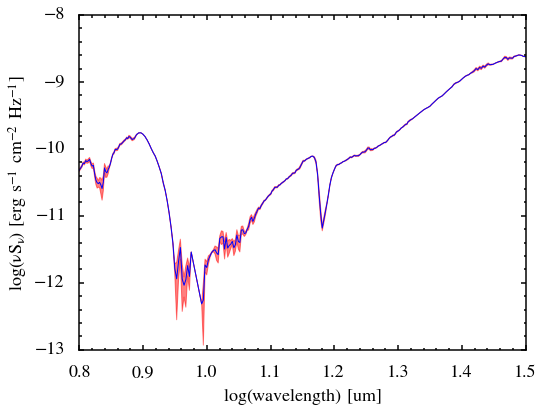

In [7]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(np.log10(bhr71['spec'][0]), np.log10((c/bhr71['spec'][0]*1e4*1e-23)*bhr71['spec'][1]), color='b')
ax.fill_between(np.log10(bhr71['spec'][0]),\
                np.log10((c/bhr71['spec'][0]*1e4*1e-23)*bhr71['spec'][1]+(c/bhr71['spec'][0]*1e4*1e-23)*bhr71['spec'][2]),\
                np.log10((c/bhr71['spec'][0]*1e4*1e-23)*bhr71['spec'][1]-(c/bhr71['spec'][0]*1e4*1e-23)*bhr71['spec'][2]), color='r', alpha=0.5)
ax.set_xlabel(r'$\rm{log(wavelength)\,[um]}$',fontsize=18)
ax.set_ylabel(r'$\rm{log(\nu S_{\nu})\,[erg\,s^{-1}\,cm^{-2}\,Hz^{-1}]}$',fontsize=18)

[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

ax.set_xlim([0.8,1.5])

# fig.savefig('/Users/yaolun/test/bhr71_sed_noise.pdf',format='pdf',dpi=300,bbox_inches='tight')